In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import svc

In [2]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [3]:
vehicle_df = pd.read_csv("vehicle-1.csv", header = 1)
vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [4]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
vehicle_df.shape

(846, 19)

In [6]:
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

All columns except 'class' are described above. class is the target variable. Except for compactness, max.length_aspect_ratio, max.lenght_rectancgularity and hollows_ratio, all variables have missing values.

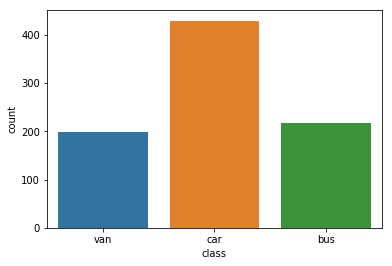

In [7]:
sns.countplot(vehicle_df['class'])

#### We see that there are around 200 vans and buses and 400+ cars in the class variable.

# Treatment of the missing values

In [8]:
vehicle_df = vehicle_df.fillna(vehicle_df.median())

In [9]:
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

The missing values have been now replaced by the median of those variable. there are no missing values in the data set now.

# Label encoding for Class

In [10]:
from sklearn import preprocessing

In [11]:
label_encoder = preprocessing.LabelEncoder() 
vehicle_df['class']= label_encoder.fit_transform(vehicle_df['class']) 
  
vehicle_df['class'].unique() 

array([2, 1, 0], dtype=int64)

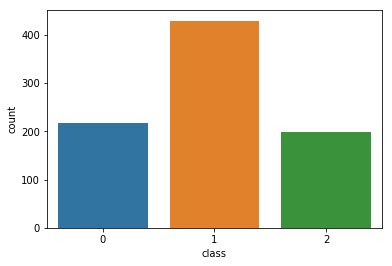

In [12]:
sns.countplot(vehicle_df['class'])

#### Van = 0, Car = 1, Bus = 2. This is the conversion of class into numeric values by using lable encoder

In [13]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

# Univariate Analysis

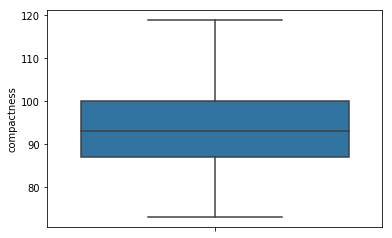

In [14]:
sns.boxplot(vehicle_df['compactness'], fliersize=2, orient='v')

In [15]:
Q1=vehicle_df['compactness'].quantile(q=0.25)
Q3=vehicle_df['compactness'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in circularity: ', L_outliers)
print('Upper outliers in circularity: ', U_outliers)

Lower outliers in circularity:  67.5
Upper outliers in circularity:  119.5


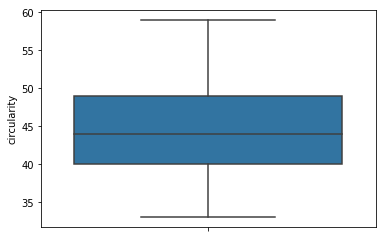

In [16]:
sns.boxplot(vehicle_df['circularity'], fliersize=2, orient='v')

In [17]:
Q1=vehicle_df['circularity'].quantile(q=0.25)
Q3=vehicle_df['circularity'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in circularity: ', L_outliers)
print('Upper outliers in circularity: ', U_outliers)

Lower outliers in circularity:  26.5
Upper outliers in circularity:  62.5


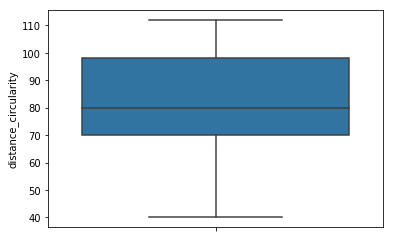

In [18]:
sns.boxplot(vehicle_df['distance_circularity'], fliersize=2, orient='v')

In [19]:
Q1=vehicle_df['distance_circularity'].quantile(q=0.25)
Q3=vehicle_df['distance_circularity'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in distance_circularity: ', L_outliers)
print('Upper outliers in distance_circularity: ', U_outliers)

Lower outliers in distance_circularity:  28.0
Upper outliers in distance_circularity:  140.0


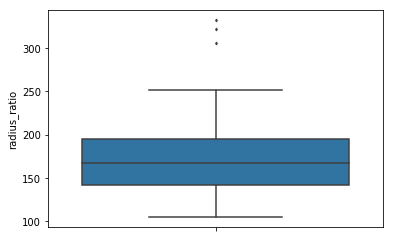

In [20]:
sns.boxplot(vehicle_df['radius_ratio'], fliersize=2, orient='v')

In [21]:
Q1=vehicle_df['radius_ratio'].quantile(q=0.25)
Q3=vehicle_df['radius_ratio'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in radius_ratio: ', L_outliers)
print('Upper outliers in radius_ratio: ', U_outliers)

Lower outliers in radius_ratio:  60.0
Upper outliers in radius_ratio:  276.0


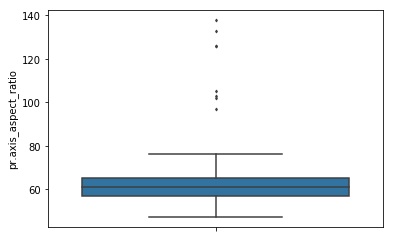

In [22]:
sns.boxplot(vehicle_df['pr.axis_aspect_ratio'], fliersize=2, orient='v')

In [23]:
Q1=vehicle_df['pr.axis_aspect_ratio'].quantile(q=0.25)
Q3=vehicle_df['pr.axis_aspect_ratio'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in pr.axis_aspect_ratio: ', L_outliers)
print('Upper outliers in pr.axis_aspect_ratio: ', U_outliers)

Lower outliers in pr.axis_aspect_ratio:  45.0
Upper outliers in pr.axis_aspect_ratio:  77.0


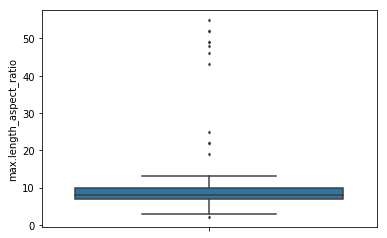

In [24]:
sns.boxplot(vehicle_df['max.length_aspect_ratio'], fliersize=2, orient='v')

In [25]:
Q1=vehicle_df['max.length_aspect_ratio'].quantile(q=0.25)
Q3=vehicle_df['max.length_aspect_ratio'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in max.length_aspect_ratio: ', L_outliers)
print('Upper outliers in max.length_aspect_ratio: ', U_outliers)

Lower outliers in max.length_aspect_ratio:  2.5
Upper outliers in max.length_aspect_ratio:  14.5


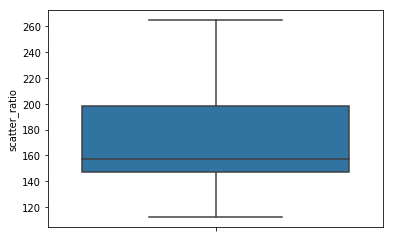

In [26]:
sns.boxplot(vehicle_df['scatter_ratio'], fliersize=2, orient='v')

In [27]:
Q1=vehicle_df['scatter_ratio'].quantile(q=0.25)
Q3=vehicle_df['scatter_ratio'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in scatter_ratio: ', L_outliers)
print('Upper outliers in scatter_ratio: ', U_outliers)

Lower outliers in scatter_ratio:  70.5
Upper outliers in scatter_ratio:  274.5


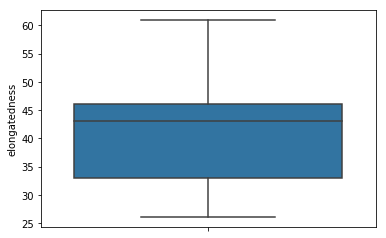

In [28]:
sns.boxplot(vehicle_df['elongatedness'], fliersize=2, orient='v')

In [29]:
Q1=vehicle_df['elongatedness'].quantile(q=0.25)
Q3=vehicle_df['elongatedness'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in elongatedness: ', L_outliers)
print('Upper outliers in elongatedness: ', U_outliers)

Lower outliers in elongatedness:  13.5
Upper outliers in elongatedness:  65.5


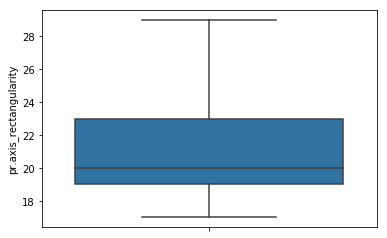

In [30]:
sns.boxplot(vehicle_df['pr.axis_rectangularity'], fliersize=2, orient='v')

In [31]:
Q1=vehicle_df['pr.axis_rectangularity'].quantile(q=0.25)
Q3=vehicle_df['pr.axis_rectangularity'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in pr.axis_rectangularity: ', L_outliers)
print('Upper outliers in pr.axis_rectangularity: ', U_outliers)

Lower outliers in pr.axis_rectangularity:  13.0
Upper outliers in pr.axis_rectangularity:  29.0


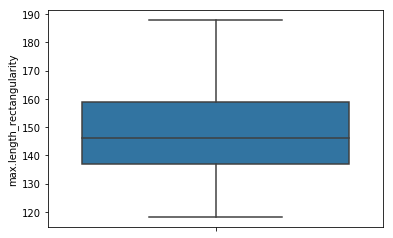

In [32]:
sns.boxplot(vehicle_df['max.length_rectangularity'], fliersize=2, orient='v')

In [33]:
Q1=vehicle_df['max.length_rectangularity'].quantile(q=0.25)
Q3=vehicle_df['max.length_rectangularity'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in max.length_rectangularity: ', L_outliers)
print('Upper outliers in max.length_rectangularity: ', U_outliers)

Lower outliers in max.length_rectangularity:  104.0
Upper outliers in max.length_rectangularity:  192.0


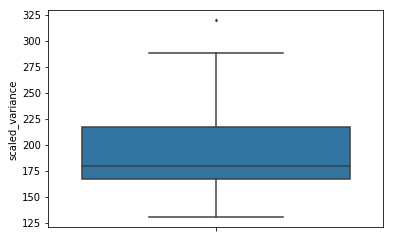

In [34]:
sns.boxplot(vehicle_df['scaled_variance'], fliersize=2, orient='v')

In [35]:
Q1=vehicle_df['scaled_variance'].quantile(q=0.25)
Q3=vehicle_df['scaled_variance'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in scaled_variance: ', L_outliers)
print('Upper outliers in scaled_variance: ', U_outliers)

Lower outliers in scaled_variance:  92.0
Upper outliers in scaled_variance:  292.0


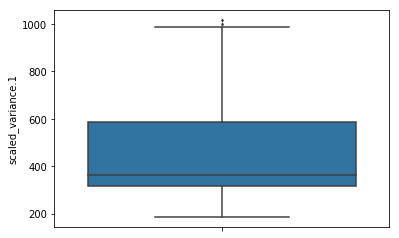

In [36]:
sns.boxplot(vehicle_df['scaled_variance.1'], fliersize=2, orient='v')

In [37]:
Q1=vehicle_df['scaled_variance.1'].quantile(q=0.25)
Q3=vehicle_df['scaled_variance.1'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in scaled_variance.1: ', L_outliers)
print('Upper outliers in scaled_variance.1: ', U_outliers)

Lower outliers in scaled_variance.1:  -84.5
Upper outliers in scaled_variance.1:  989.5


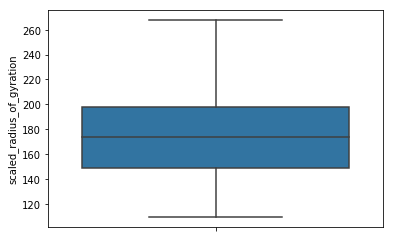

In [38]:
sns.boxplot(vehicle_df['scaled_radius_of_gyration'], fliersize=2, orient='v')

In [39]:
Q1=vehicle_df['scaled_radius_of_gyration'].quantile(q=0.25)
Q3=vehicle_df['scaled_radius_of_gyration'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in scaled_radius_of_gyration: ', L_outliers)
print('Upper outliers in scaled_radius_of_gyration: ', U_outliers)

Lower outliers in scaled_radius_of_gyration:  75.5
Upper outliers in scaled_radius_of_gyration:  271.5


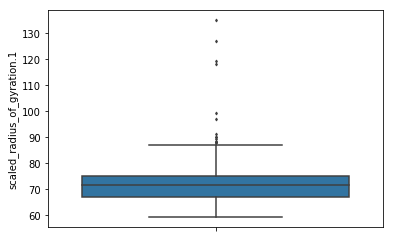

In [40]:
sns.boxplot(vehicle_df['scaled_radius_of_gyration.1'], fliersize=2, orient='v')

In [41]:
Q1=vehicle_df['scaled_radius_of_gyration.1'].quantile(q=0.25)
Q3=vehicle_df['scaled_radius_of_gyration.1'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in scaled_radius_of_gyration.1: ', L_outliers)
print('Upper outliers in scaled_radius_of_gyration.1: ', U_outliers)

Lower outliers in scaled_radius_of_gyration.1:  55.0
Upper outliers in scaled_radius_of_gyration.1:  87.0


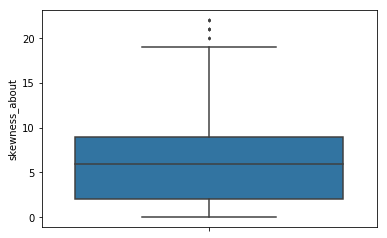

In [42]:
sns.boxplot(vehicle_df['skewness_about'], fliersize=2, orient='v')

In [43]:
Q1=vehicle_df['skewness_about'].quantile(q=0.25)
Q3=vehicle_df['skewness_about'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in skewness_about: ', L_outliers)
print('Upper outliers in skewness_about: ', U_outliers)

Lower outliers in skewness_about:  -8.5
Upper outliers in skewness_about:  19.5


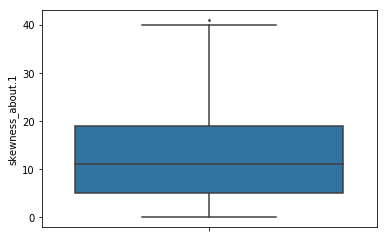

In [44]:
sns.boxplot(vehicle_df['skewness_about.1'], fliersize=2, orient='v')

In [45]:
Q1=vehicle_df['skewness_about.1'].quantile(q=0.25)
Q3=vehicle_df['skewness_about.1'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in skewness_about.1: ', L_outliers)
print('Upper outliers in skewness_about.1: ', U_outliers)

Lower outliers in skewness_about.1:  -16.0
Upper outliers in skewness_about.1:  40.0


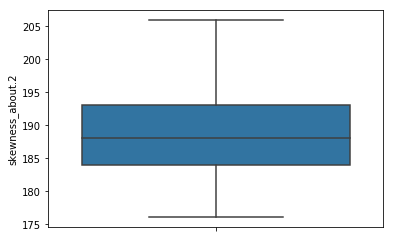

In [46]:
sns.boxplot(vehicle_df['skewness_about.2'], fliersize=2, orient='v')

In [47]:
Q1=vehicle_df['skewness_about.2'].quantile(q=0.25)
Q3=vehicle_df['skewness_about.2'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in skewness_about.2: ', L_outliers)
print('Upper outliers in skewness_about.2: ', U_outliers)

Lower outliers in skewness_about.2:  170.5
Upper outliers in skewness_about.2:  206.5


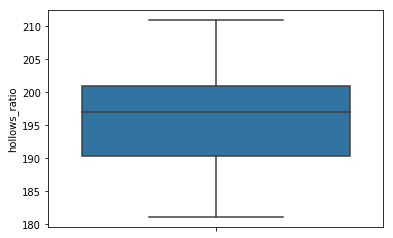

In [48]:
sns.boxplot(vehicle_df['hollows_ratio'], fliersize=2, orient='v')

In [49]:
Q1=vehicle_df['hollows_ratio'].quantile(q=0.25)
Q3=vehicle_df['hollows_ratio'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in hollows_ratio: ', L_outliers)
print('Upper outliers in hollows_ratio: ', U_outliers)

Lower outliers in hollows_ratio:  174.125
Upper outliers in hollows_ratio:  217.125


# Outlier Treatment

In [50]:
vehicle_df1 = vehicle_df
for col_name in vehicle_df1.columns[:-1]:
    q1 = vehicle_df1[col_name].quantile(0.25)
    q3 = vehicle_df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    vehicle_df1.loc[(vehicle_df1[col_name] < low) | (vehicle_df1[col_name] > high), col_name] = vehicle_df1[col_name].median()

#### Outliers have been treated using the median across the entire dataframe.

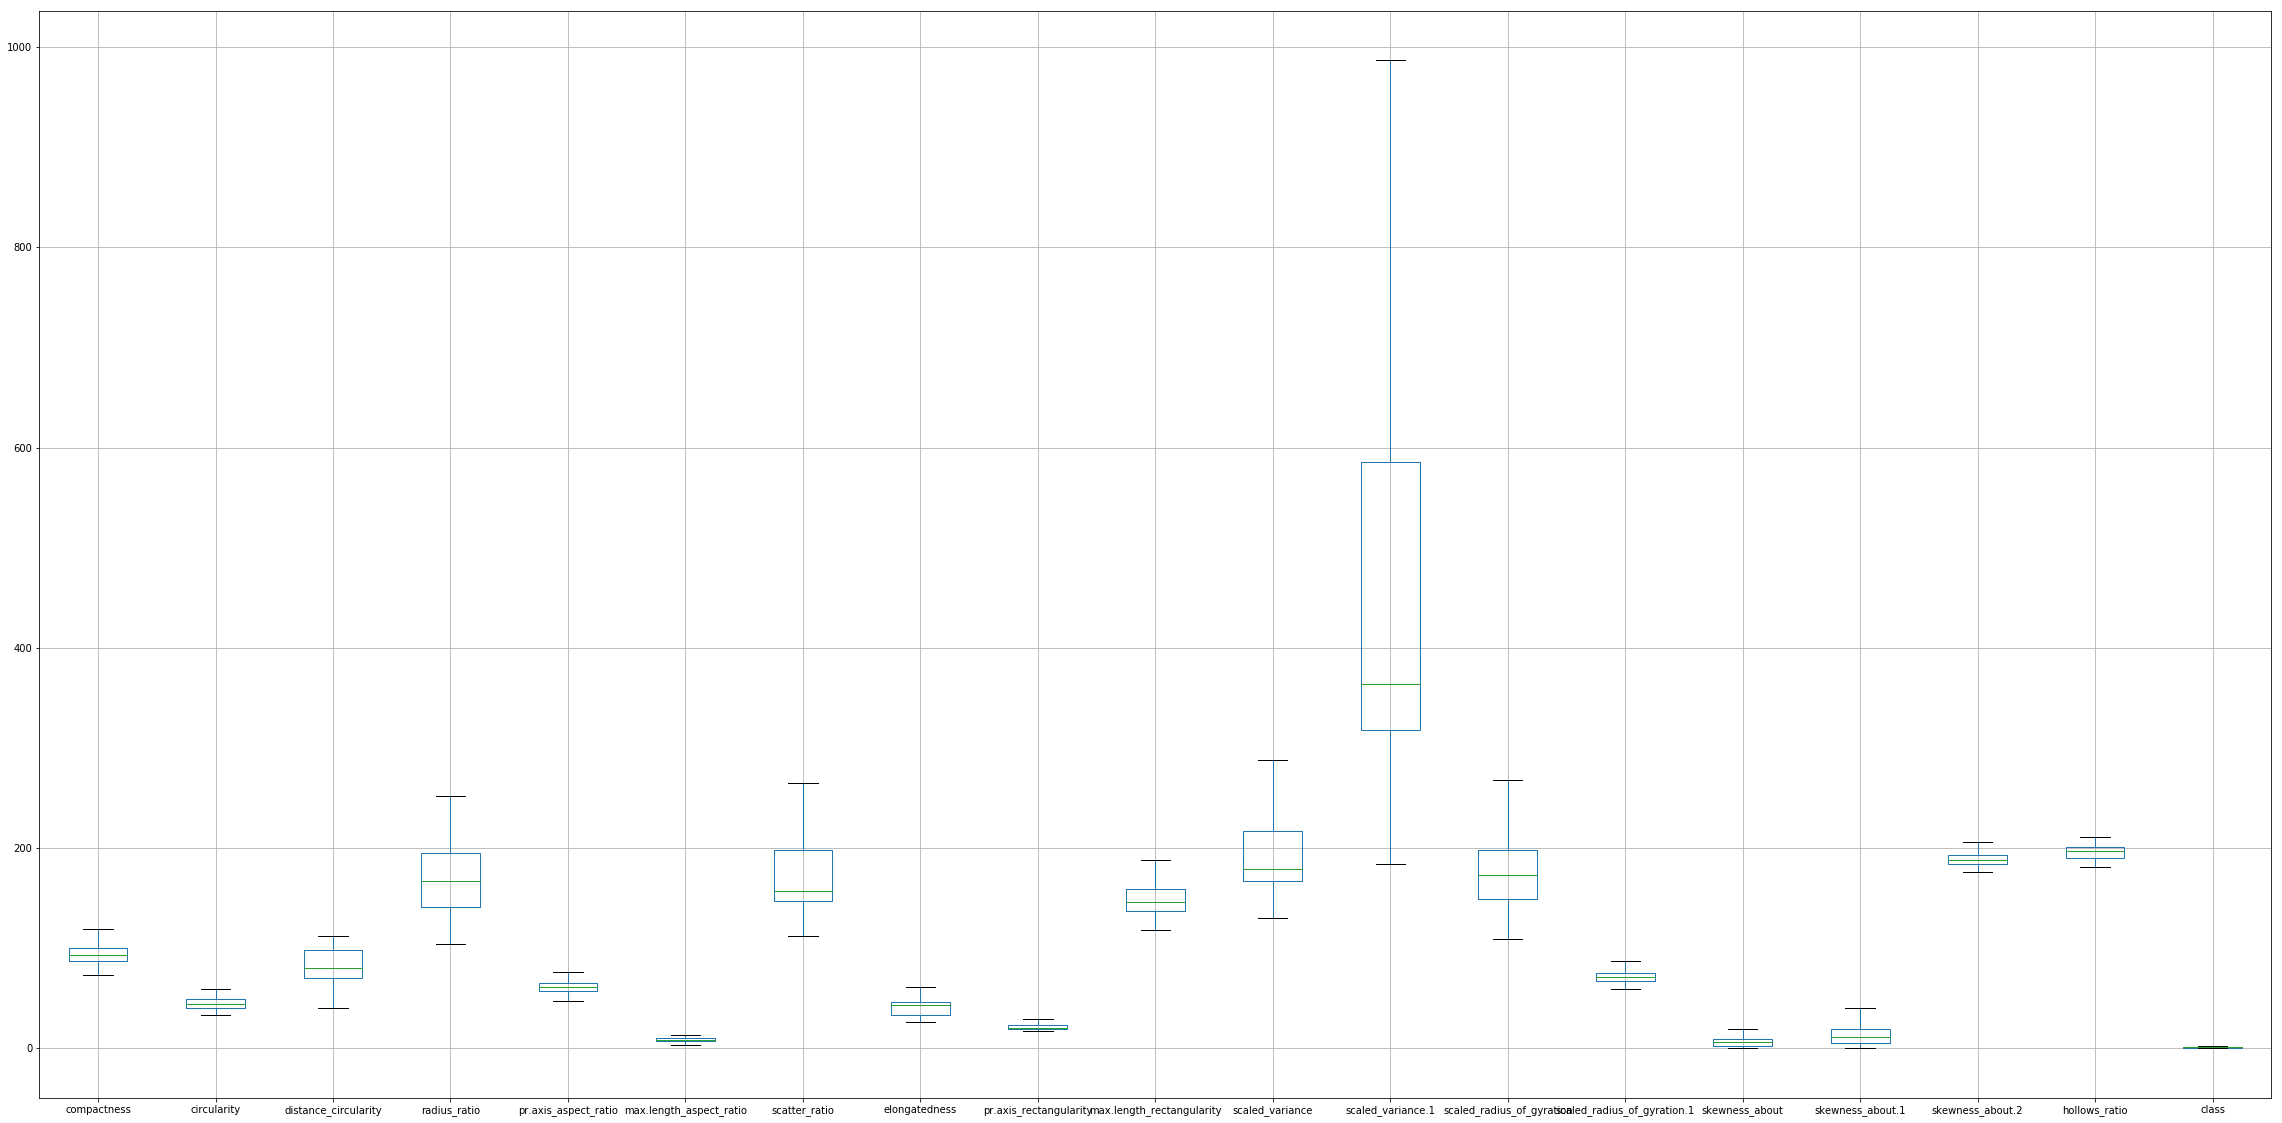

In [51]:
vehicle_df1.boxplot(figsize=(40,20))

## The missing values and outliers have been treated in the data. The missing values were imputed by applying median in place of missing values. Label encoding was done for the varaible named 'class'. Outlier have been treated as well

# Bivariate Analysis. Visual Analysis of the data

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


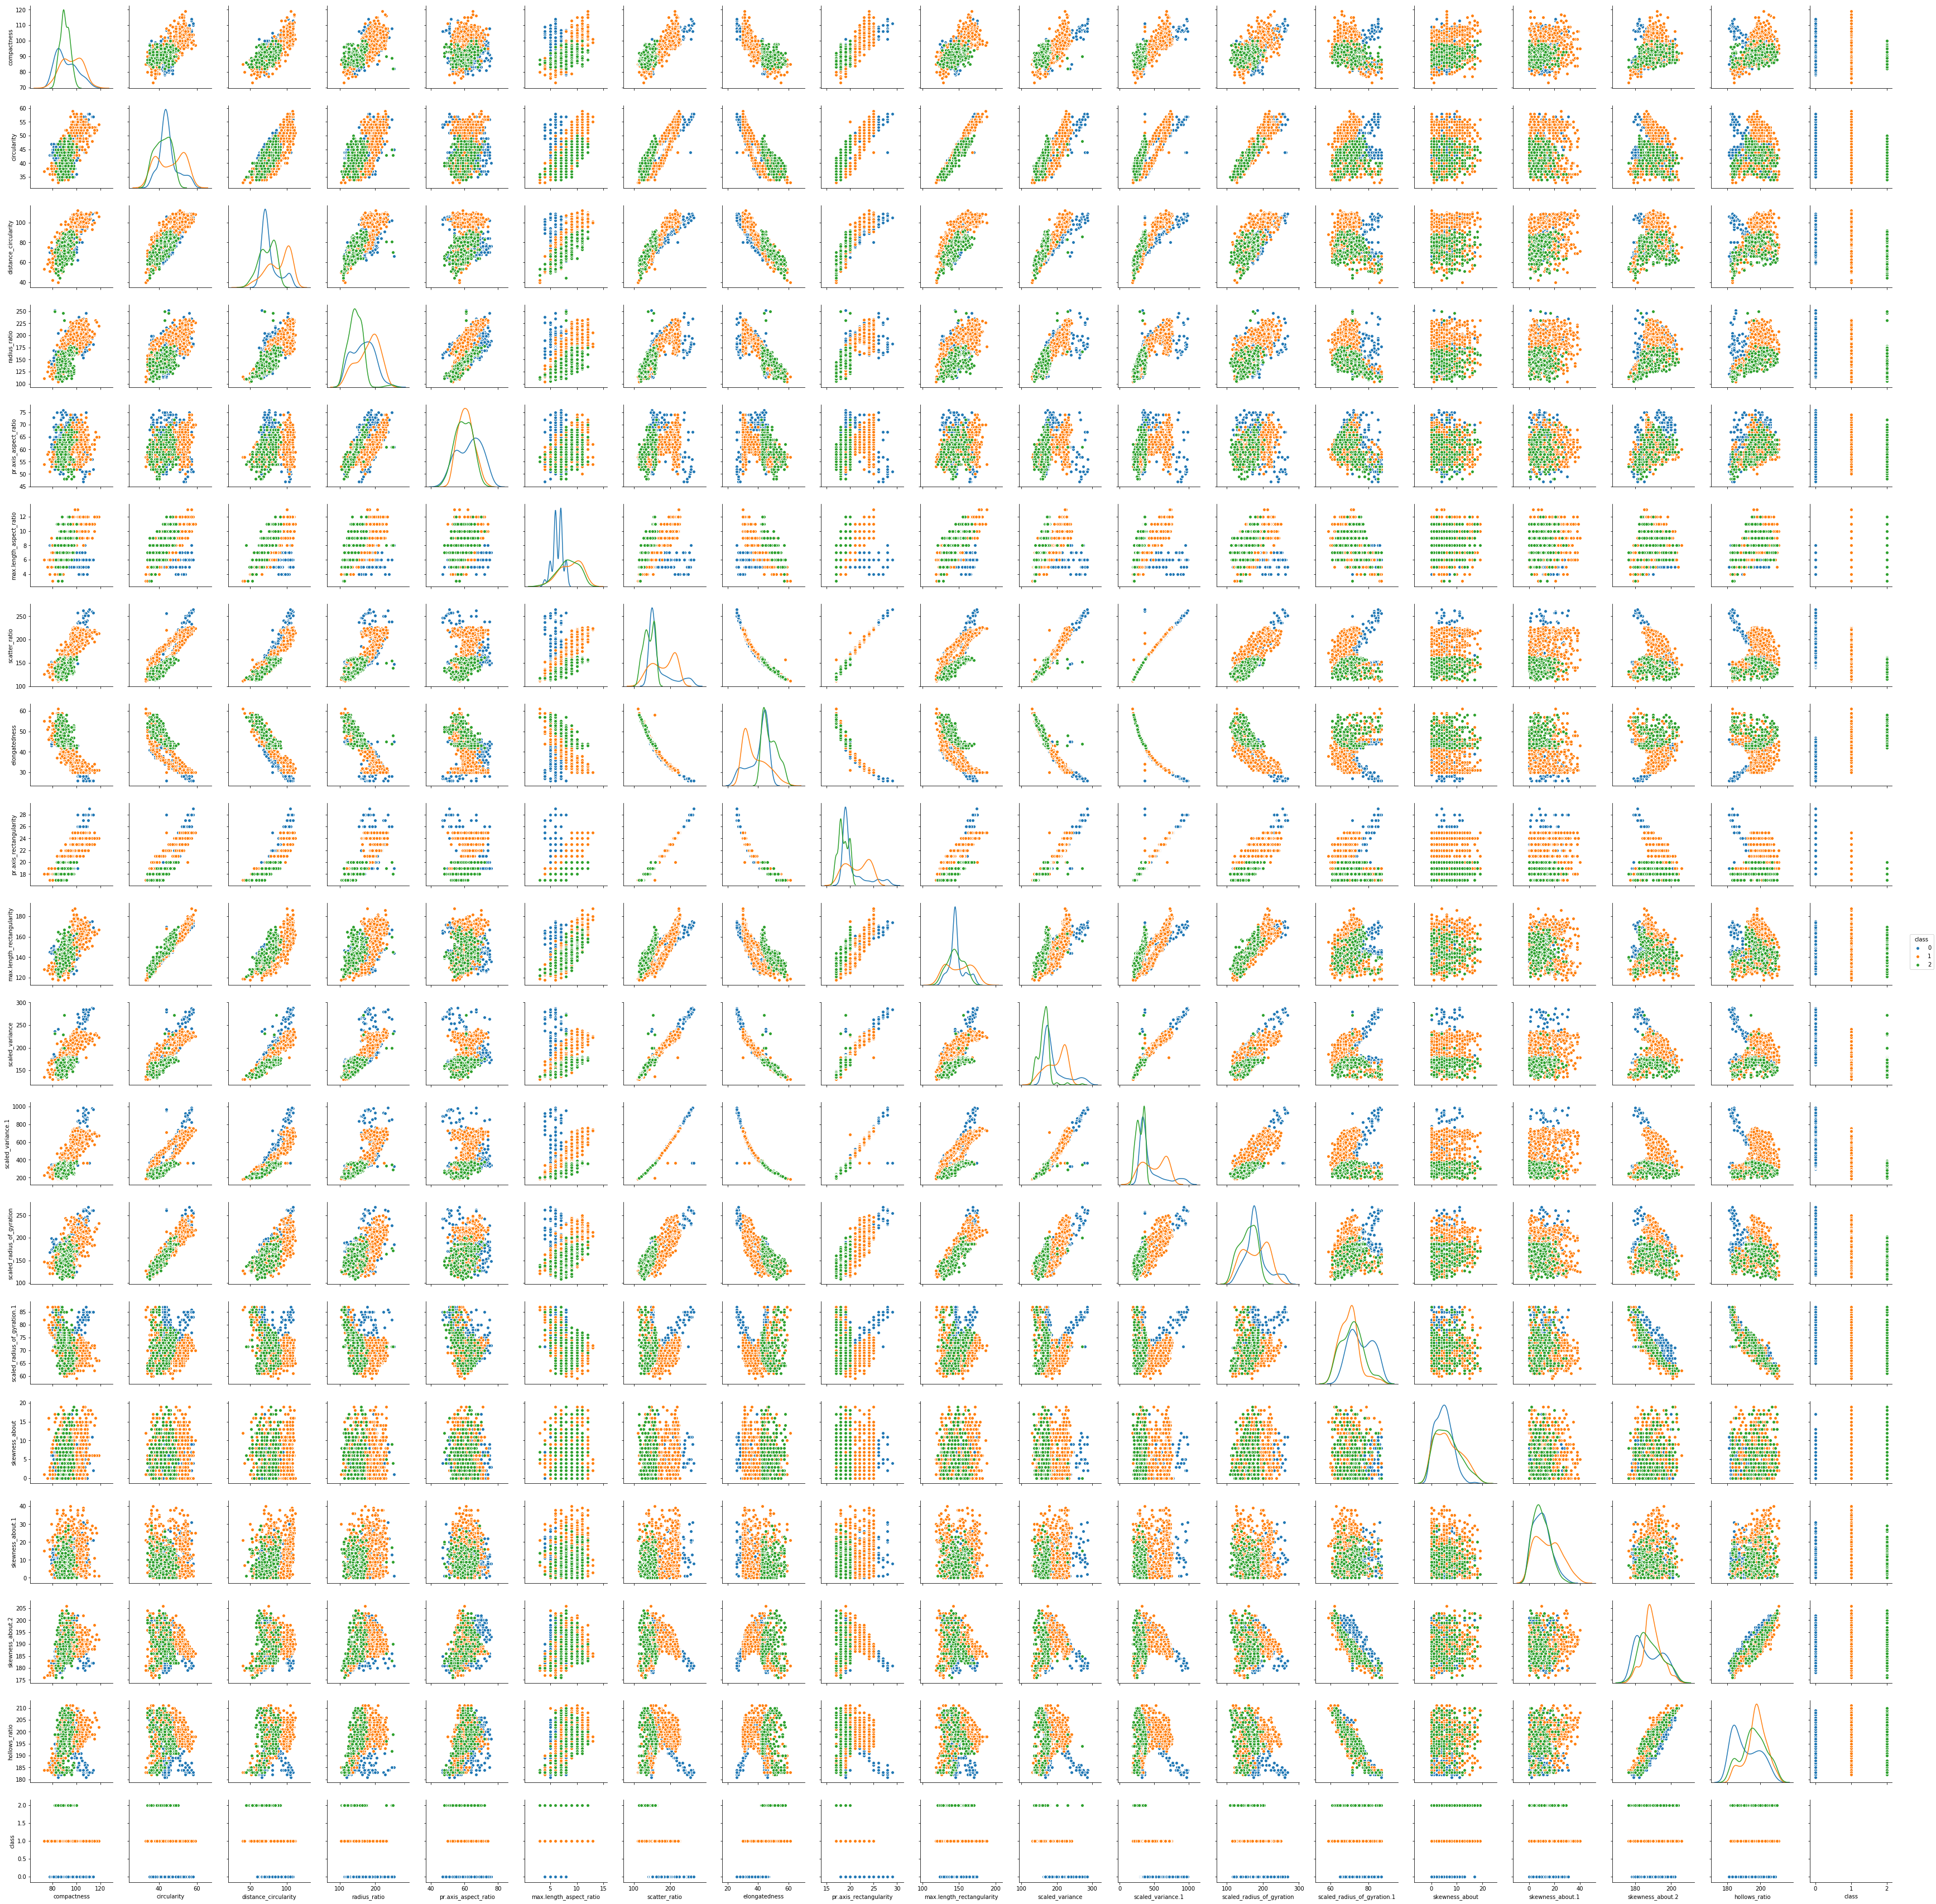

In [52]:
sns.pairplot(vehicle_df1,hue='class', diag_kind='kde')

## Correlation matrix

In [53]:
cor=vehicle_df1.corr()
cor

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   
class                           -0.213948             -0.209298   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                            

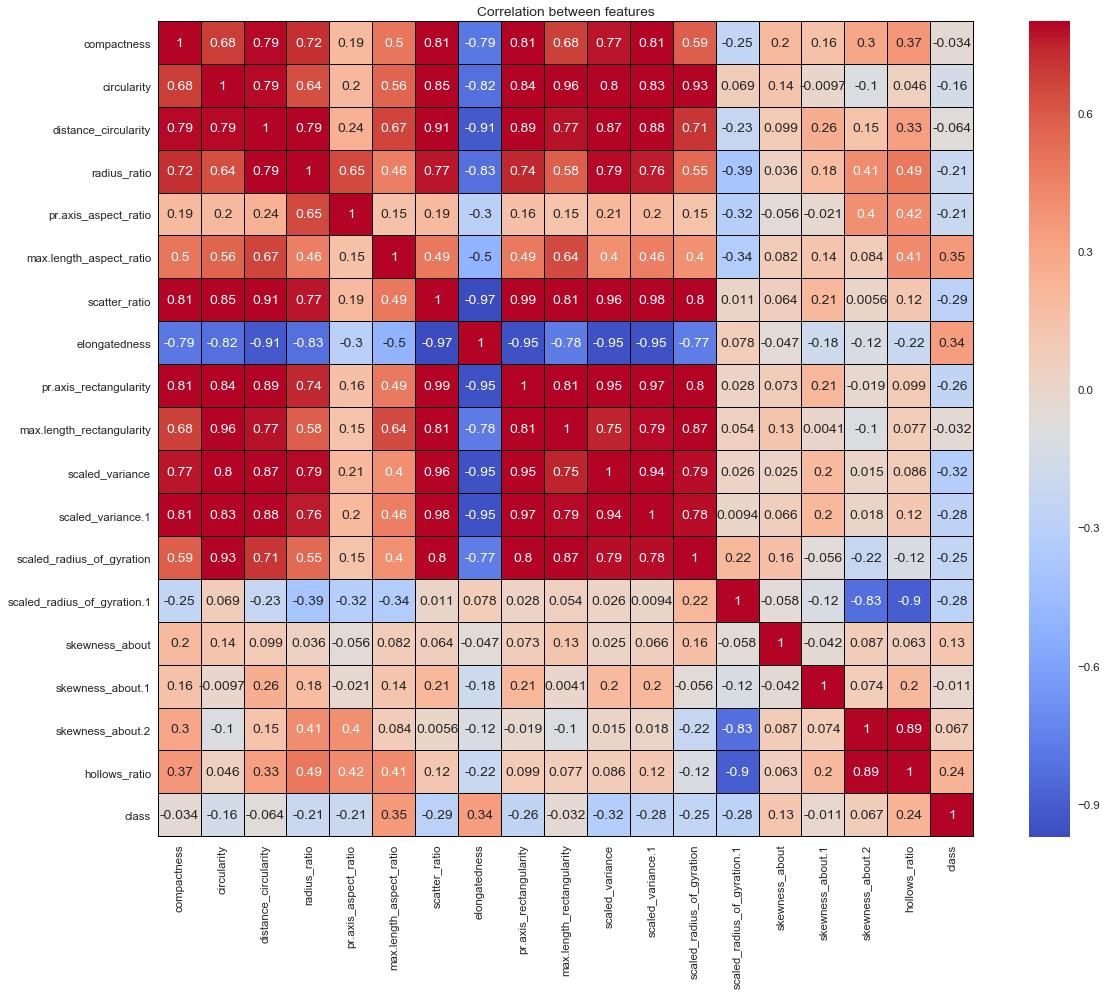

In [54]:
sns.set(font_scale=1.15)
plt.figure(figsize=(20,15))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="coolwarm",linecolor="black")
plt.title('Correlation between features');

### max.length_aspect_ratio, elongatedness, skewness_about, skewness_about1, and hollows_ratio show positive correlation with target variable class.

In [55]:
vehicle_df1.shape

(846, 19)

In [56]:
vehicle_df1.groupby(["class"]).count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
0              218          218                   218           218   
1              429          429                   429           429   
2              199          199                   199           199   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
0                       218                      218            218   
1                       429                      429            429   
2                       199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
0                218                     218                        218   
1                429                     429                        429   
2                199                     199                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
0                  218                218                        218   
1                  429                429                        429   
2                  199                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
0                              218             218               218   
1                              429             429               429   
2                              199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
0                   218            218  
1                   429            429  
2                   199            199

### Class imbalance is checked for. There are more cars in the dataset than vans and buses. The number of cars in double compared to vans and buses and may have an influence on the classification.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
array = vehicle_df1.values
X = array[:,0:18]
Y = array[:,18]
le = preprocessing.LabelEncoder()
le.fit(Y)
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [58]:
clf = svm.SVC(gamma= 0.0025, C=3)    

In [59]:
clf.fit(X_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0025, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
y_pred = clf.predict(X_test)

In [61]:
SVM_Accuracy = getAccuracy(y_test , y_pred)   # Calling getAccuracy function instead of usinig array comparison to get the %age accuracy
SVM_Accuracy

88.9763779527559

# Accuracy of SVM Model is 88.98%

In [62]:
from sklearn import metrics

In [63]:
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Applying KFold to SVM

In [64]:
vehiclekfold_df = vehicle_df1
array = vehiclekfold_df.values
X = array[:,0:18]
y = array[:,18]
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.50, random_state=1)
num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(clf,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9079411764705883
Standard Deviation:  0.06901572585451025


## Accuracy of SVM model with KFold validation is improved by approx 2% and is 90.80%

# Applying PCA on the data

In [65]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix)

[[ 6.78065662e+01  3.45953782e+01  1.02393288e+02  1.91108904e+02
   8.91493278e+00  8.49722047e+00  2.22142552e+02 -5.07377062e+01
   1.73442164e+01  8.08185544e+01  1.96740865e+02  1.15737644e+03
   1.56845875e+02 -1.25103809e+01  7.42980962e+00  1.14292109e+01
   1.51240421e+01  2.23917272e+01]
 [ 3.45953782e+01  3.76292990e+01  7.65088408e+01  1.25871378e+02
   6.99890190e+00  7.09658260e+00  1.72677241e+02 -3.93651013e+01
   1.33922797e+01  8.55986081e+01  1.52824981e+02  8.84959558e+02
   1.84837067e+02  2.59720019e+00  3.82487026e+00 -5.26406200e-01
  -3.94100885e+00  2.11506008e+00]
 [ 1.02393288e+02  7.65088408e+01  2.47796994e+02  4.01922920e+02
   2.15903409e+01  2.16662162e+01  4.72978160e+02 -1.12064585e+02
   3.63889560e+01  1.76978817e+02  4.24815891e+02  2.42596483e+03
   3.61587476e+02 -2.22357722e+01  7.13424958e+00  3.66615077e+01
   1.41490327e+01  3.89624225e+01]
 [ 1.91108904e+02  1.25871378e+02  4.01922920e+02  1.03348796e+03
   1.17399578e+02  3.07868675e+01  8.

In [66]:
pca = PCA(n_components=6)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [67]:
print(pca.explained_variance_)

[34058.40257798   576.59672368   422.84425672   112.72332963
    88.46477087    57.93632194]


In [68]:
print(pca.components_)

[[ 3.61201326e-02  2.78577494e-02  7.60066421e-02  1.34573101e-01
   6.37248536e-03  5.26082083e-03  1.77019465e-01 -4.04237720e-02
   1.36964042e-02  6.28298081e-02  1.59835491e-01  9.44216679e-01
   1.40158604e-01  1.19126724e-04  1.68662387e-03  9.64527873e-03
   7.18367027e-04  5.05536158e-03]
 [-6.49878462e-02  6.23549009e-02 -9.99873445e-02 -7.14180537e-01
  -1.35918427e-01 -1.01650227e-02  4.20806627e-03  3.37862674e-02
   3.22842588e-03  1.53598573e-01 -4.42407407e-02  3.12620202e-02
   5.41322300e-01  1.86296947e-01  1.85636078e-02 -9.49944502e-02
  -1.90949919e-01 -2.28027323e-01]
 [ 1.90346104e-02  1.14367435e-01  1.10349593e-01  5.18826308e-01
   1.25340241e-01  1.99836567e-02  8.39463371e-02 -4.69288056e-02
   4.30195906e-03  2.34682152e-01  1.78766374e-01 -2.55984397e-01
   7.10236477e-01 -4.11287130e-02  2.92537219e-02 -1.31502686e-01
   2.48738362e-02  4.86483656e-02]
 [-9.76817468e-02 -8.04950643e-02 -4.13718720e-02  1.35371534e-02
  -7.18108998e-02 -6.33104582e-02  2.

In [69]:
print(pca.explained_variance_ratio_)

[0.96066937 0.01626379 0.01192697 0.00317953 0.00249528 0.00163418]


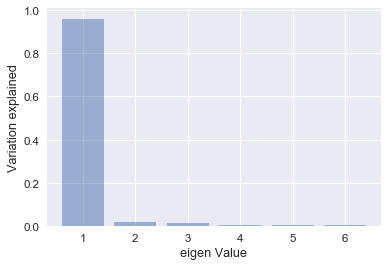

In [70]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

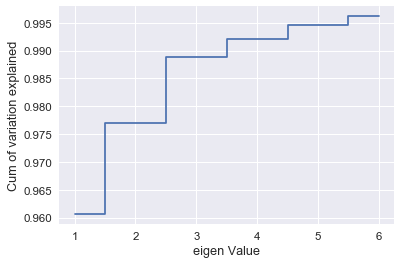

In [71]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

####  With 5 variables we can explain over 99.5% of the variation in the original data! With 3 Variable we are able to explain about 98.9% of the variation

In [73]:
pca3 = PCA(n_components=3)
pca3.fit(X)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X)

[[ 3.61201326e-02  2.78577494e-02  7.60066421e-02  1.34573101e-01
   6.37248536e-03  5.26082083e-03  1.77019465e-01 -4.04237720e-02
   1.36964042e-02  6.28298081e-02  1.59835491e-01  9.44216679e-01
   1.40158604e-01  1.19126724e-04  1.68662387e-03  9.64527873e-03
   7.18367027e-04  5.05536158e-03]
 [-6.49878462e-02  6.23549009e-02 -9.99873445e-02 -7.14180537e-01
  -1.35918427e-01 -1.01650227e-02  4.20806627e-03  3.37862674e-02
   3.22842588e-03  1.53598573e-01 -4.42407407e-02  3.12620202e-02
   5.41322300e-01  1.86296947e-01  1.85636078e-02 -9.49944502e-02
  -1.90949919e-01 -2.28027323e-01]
 [ 1.90346104e-02  1.14367435e-01  1.10349593e-01  5.18826308e-01
   1.25340241e-01  1.99836567e-02  8.39463371e-02 -4.69288056e-02
   4.30195906e-03  2.34682152e-01  1.78766374e-01 -2.55984397e-01
   7.10236477e-01 -4.11287130e-02  2.92537219e-02 -1.31502686e-01
   2.48738362e-02  4.86483656e-02]]
[0.96066937 0.01626379 0.01192697]


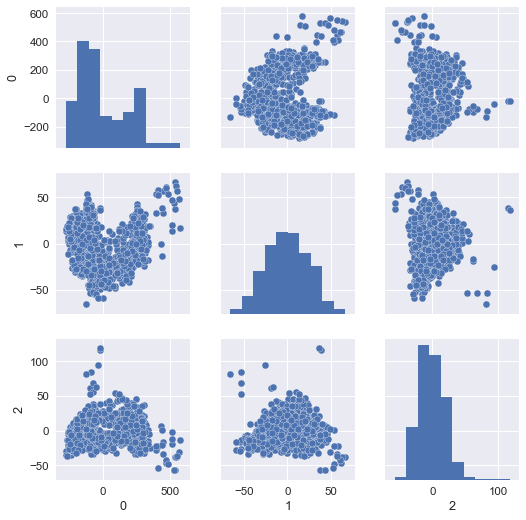

In [74]:
sns.pairplot(pd.DataFrame(Xpca3))

  # Fit SVM Model with PCA

In [78]:
SVM_model = SVC()
SVM_model.fit(Xpca3, Y)
SVM_model.score(Xpca3, Y)

0.9988179669030733

#### The model accuracy of SVM is 88.98%. With KFold validation the accuracy of SVM model is increased by 2% to 90.8%. Using PCA, the model accuracy is increased to 99.88%